In [6]:
from keras.layers import Input, LSTM, RepeatVector
from keras.models import Model
from keras.datasets import mnist
from keras.layers import Input,Dense, Conv2D, MaxPooling2D,UpSampling2D
from keras.models import Model
from keras import backend as k
from keras.callbacks import TensorBoard
import numpy as np
import matplotlib.pyplot as plt

In [17]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 784, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 784, 1))  

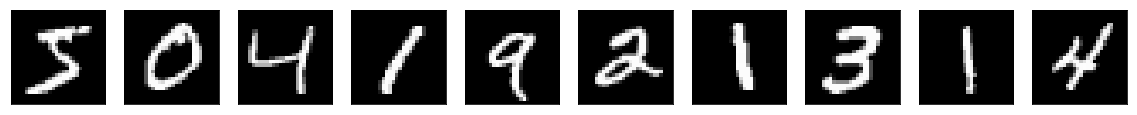

In [11]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [32]:
timesteps = 784
input_dim = 1
latent_dim = 32

inputs = Input(shape=(timesteps, input_dim))

encoded = LSTM(latent_dim)(inputs)

decoded = RepeatVector(timesteps)(encoded)
decoded = LSTM(input_dim, return_sequences=True)(decoded)

sequence_autoencoder = Model(inputs, decoded)
encoder = Model(inputs, encoded)

In [33]:
autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['acc'])

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 784, 1)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 32)                4352      
_________________________________________________________________
repeat_vector_7 (RepeatVecto (None, 784, 32)           0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 784, 1)            136       
Total params: 4,488
Trainable params: 4,488
Non-trainable params: 0
_________________________________________________________________


In [34]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 574s - loss: 0.4148 - acc: 0.8088 - val_loss: 0.3921 - val_acc: 0.8072
Epoch 2/10
60000/60000 [==============================] - 575s - loss: 0.3876 - acc: 0.8088 - val_loss: 0.3909 - val_acc: 0.8072
Epoch 3/10
60000/60000 [==============================] - 631s - loss: 0.3875 - acc: 0.8088 - val_loss: 0.3909 - val_acc: 0.8072
Epoch 4/10
60000/60000 [==============================] - 646s - loss: 0.3875 - acc: 0.8088 - val_loss: 0.3909 - val_acc: 0.8072
Epoch 5/10
60000/60000 [==============================] - 613s - loss: 0.3874 - acc: 0.8088 - val_loss: 0.3910 - val_acc: 0.8072
Epoch 6/10
60000/60000 [==============================] - 598s - loss: 0.3874 - acc: 0.8088 - val_loss: 0.3908 - val_acc: 0.8072
Epoch 7/10
60000/60000 [==============================] - 606s - loss: 0.3874 - acc: 0.8088 - val_loss: 0.3908 - val_acc: 0.8072
Epoch 8/10
60000/60000 [=======================

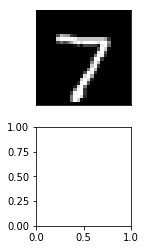

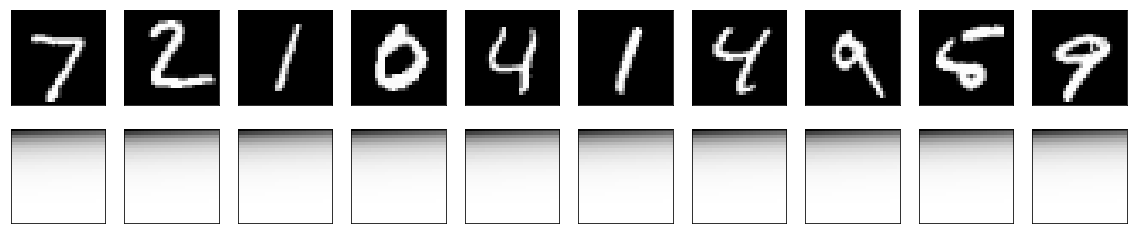

In [37]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()